Dupla:

Elpidio Cabral - 536369

Renan Victor - 538428

In [5]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 1.0 MB/s eta 0:00:00


Questão 01 - Leitura do arquivo usando pandas.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/estoque.csv')
df

,Data_Atualizacao,Produto,Categoria,Quantidade,Preco_Unitario
0,29/03/2023,Monitor,Eletrônicos,97,398.63
1,30/08/2023,Desodorante,Higiene,45,272.30
2,07/12/2023,Arroz,Alimentos,34,487.97
3,15/07/2023,Sabão em Pó,Limpeza,181,419.03
4,14/08/2023,Notebook,Eletrônicos,87,458.93
...,...,...,...,...,...
595,22/07/2023,Teclado,Eletrônicos,30,373.67
596,04/07/2023,Detergente,Limpeza,145,245.53
597,26/07/2023,Sabão em Pó,Limpeza,97,456.52
598,21/12/2023,Esponja,Limpeza,39,242.94


Q2 - Calcular o valor total por produto

In [27]:
df['Valor_Estoque'] = df['Quantidade'] * df['Preco_Unitario'] # This line creates the 'Valor_Estoque' column
preco_total_por_produto = df.groupby(['Produto'])['Valor_Estoque'].sum().reset_index()
preco_total_por_produto

,Produto,Valor_Estoque
0,Arroz,719645.46
1,Açúcar,479149.04
2,Café,476571.30
3,Desinfetante,748190.68
4,Desodorante,874621.57
5,Detergente,828664.61
6,Esponja,674606.56
7,Feijão,630808.55
8,Fone de Ouvido,1136656.38
9,Macarrão,446597.93


Q3 - Filtrar produtos com baixo estoque.

In [28]:
baixo_estoque = df[df['Quantidade'] < 10]
baixo_estoque

,Data_Atualizacao,Produto,Categoria,Quantidade,Preco_Unitario,Valor_Estoque
30,08/12/2023,Notebook,Eletrônicos,6,54.61,327.66
35,02/02/2023,Mouse,Eletrônicos,4,393.09,1572.36
47,21/03/2023,Papel Higiênico,Higiene,3,317.44,952.32
79,27/03/2023,Água Sanitária,Limpeza,9,305.53,2749.77
102,26/11/2023,Arroz,Alimentos,2,423.23,846.46
130,24/09/2023,Sabão em Pó,Limpeza,7,463.33,3243.31
143,25/09/2023,Papel Higiênico,Higiene,3,495.82,1487.46
152,03/07/2023,Esponja,Limpeza,9,93.36,840.24
176,10/11/2023,Fone de Ouvido,Eletrônicos,8,43.73,349.84
355,01/02/2023,Açúcar,Alimentos,9,410.30,3692.70


Q4 -  Salvar os resultados

In [29]:
baixo_estoque.to_csv('baixo_estoque.csv', index=False)

with pd.ExcelWriter('valor_total_estoque.xlsx', engine='xlsxwriter') as writer:
    for categoria, grupo in df.groupby('Categoria'):
      grupo_filtrado = grupo[['Data_Atualizacao', 'Produto', 'Quantidade', 'Preco_Unitario', 'Valor_Estoque']]
      grupo_filtrado.to_excel(writer, sheet_name=categoria, index=False)

Q5 - Identificar o produto mais valioso por categoria

In [30]:
produtos_top = (
    df.loc[df.groupby('Categoria')['Valor_Estoque'].idxmax()]
    [['Categoria', 'Produto', 'Valor_Estoque']]
    .reset_index(drop=True)
)
produtos_top

,Categoria,Produto,Valor_Estoque
0,Alimentos,Açúcar,81886.09
1,Eletrônicos,Notebook,90268.20
2,Higiene,Sabonete,92627.24
3,Limpeza,Detergente,83029.62


Q6 - Calcular o valor total do estoque por categoria


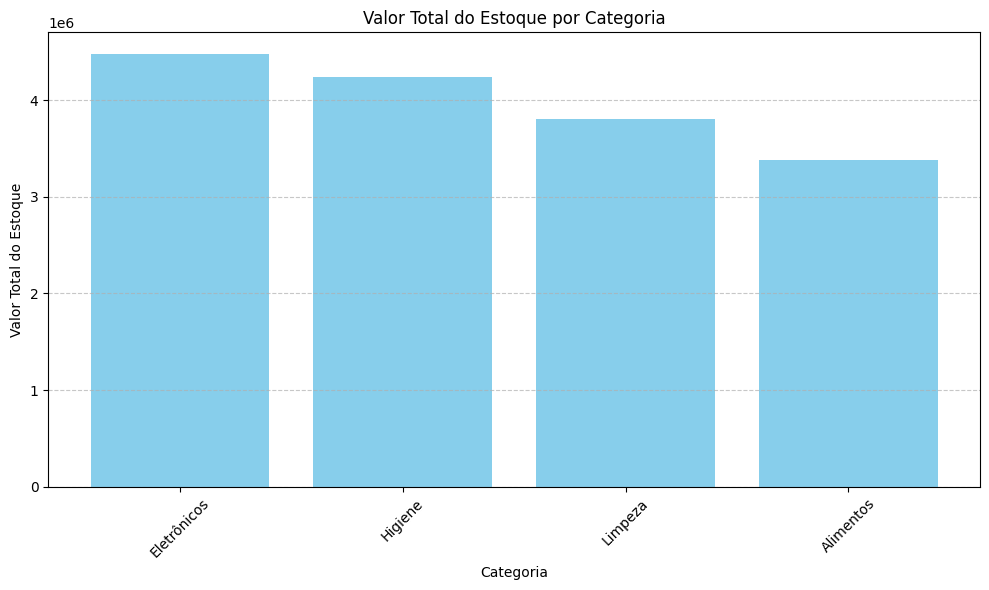

In [31]:
valor_total_por_categoria = df.groupby('Categoria')['Valor_Estoque'].sum().sort_values(ascending=False).reset_index().rename(columns={'Valor_Estoque': 'Valor_Total_Categoria'})
valor_total_por_categoria

plt.figure(figsize=(10, 6))
plt.bar(valor_total_por_categoria['Categoria'], valor_total_por_categoria['Valor_Total_Categoria'], color='skyblue')
plt.title('Valor Total do Estoque por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor Total do Estoque')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

valor_total_por_categoria.to_csv('valor_total_por_categoria.csv', index=False)


Q7 - Classificar produtos em faixas de estoque

In [32]:
def classificarNivel(Quantidade):
    if Quantidade < 10:
        return 'Baixo'
    elif Quantidade < 50:
        return 'Médio'
    else:
        return 'Alto'

df['Nivel_Estoque'] = df['Quantidade'].apply(classificarNivel)

contagem_niveis = df['Nivel_Estoque'].value_counts().reset_index()
contagem_niveis.columns = ['Nivel_Estoque', 'Contagem']
contagem_niveis

,Nivel_Estoque,Contagem
0,Alto,465
1,Médio,117
2,Baixo,18


Q8 - Análise Temporal

<ipython-input-33-5f1e68f937fb>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data_Atualizacao'] = pd.to_datetime(df['Data_Atualizacao'])
<ipython-input-33-5f1e68f937fb>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key='Data_Atualizacao', freq='M')).agg(


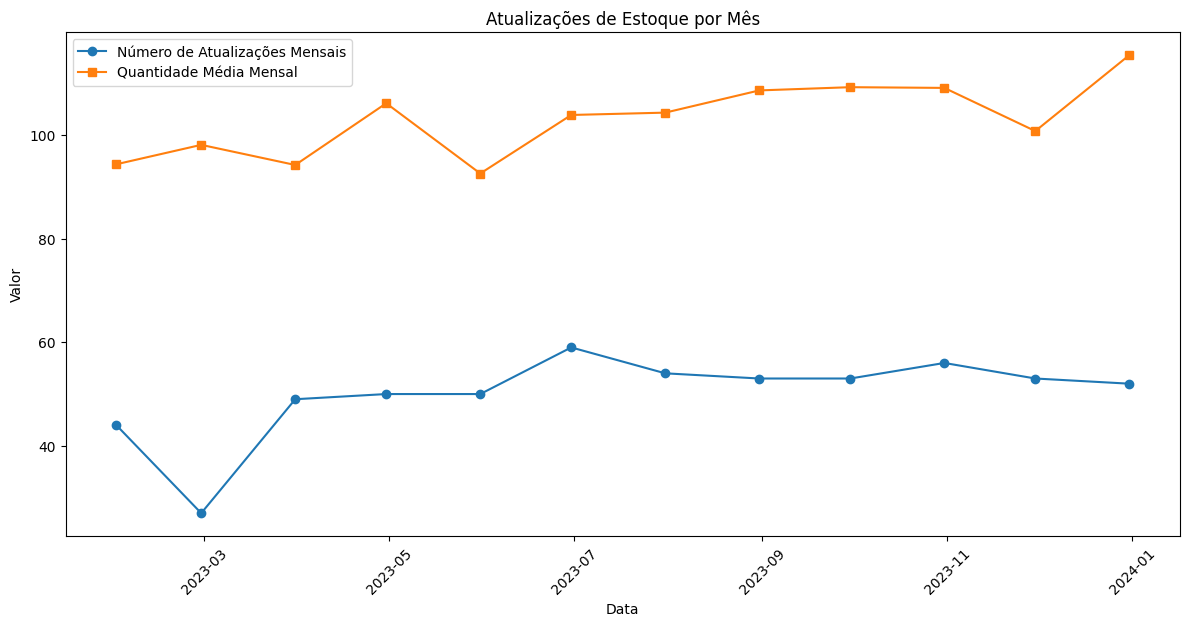

In [33]:
df['Data_Atualizacao'] = pd.to_datetime(df['Data_Atualizacao'])

df_mensal = (
    df.groupby(pd.Grouper(key='Data_Atualizacao', freq='M')).agg(
      Numero_Atualizacoes = ("Produto", "count"),
      Quantidade_Media = ("Quantidade", "mean")
      )
    .reset_index()
)
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['Data_Atualizacao'], df_mensal['Numero_Atualizacoes'], marker='o',label='Número de Atualizações Mensais')
plt.plot(df_mensal['Data_Atualizacao'], df_mensal['Quantidade_Media'], marker='s', label='Quantidade Média Mensal')
plt.title('Atualizações de Estoque por Mês')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()